# Part 2 - Quick EDA Overview of Extracted TMDB Data

> Quick EDA for checking overview of movie data extracted from TMDB api.


- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
- How many movies are there in each of the certification categories (G/PG/PG-13/R)?
- What is the average revenue per certification category?
- What is the average budget per certification category

In [1]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

plt.style.use('fivethirtyeight')
sns.set_context('talk')

pd.set_option('display.max_columns',100)

In [3]:
# plt.rcParams['figure.facecolor']

In [4]:
# FOLDER = "Data-Previous/tmdb/"
FOLDER = "Data/"
# sorted(os.listdir(FOLDER))

In [5]:
## Should show students glob
import glob
q  = f"{FOLDER}*combined*"#final*.csv.gz"
files = sorted(glob.glob(q))
files

['Data/combined_tmdb_api_data.csv.gz']

## Concatenating DataFrames

In [6]:
# df = pd.read_csv(files[0])
# df

In [7]:
# # df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )
# df_list =  []
# files_error = []
# for f in files:
#     try:
#         temp_df = pd.read_csv(f,lineterminator='\n')
#         df_list.append(temp_df)
#     except Exception as e:
#         print(f"[!] Error for {f}")
#         display(e)
#         files_error.append(f)
        
# # df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in files] )
# df = pd.concat(df_list)
# df
# # df

In [8]:
# ## drop placeholder imdb ids of 0
# df = df.loc[ df['imdb_id']!='0']
# df

### Adding Release Year

In [9]:
# df['Release Year'] = df['release_date'].apply(lambda x: float(str(x).split('-')[0]))
# df

In [10]:
## Saving combined data 
fname =FOLDER+'combined_tmdb_api_data.csv.gz'
# Code for making combined file moved to notebook 2A
# df.to_csv(fname,compression='gzip',index=False)
df = pd.read_csv(fname, lineterminator='\n')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93059 entries, 0 to 93058
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  93059 non-null  bool   
 1   backdrop_path          57215 non-null  object 
 2   belongs_to_collection  5218 non-null   object 
 3   budget                 93059 non-null  int64  
 4   genres                 93059 non-null  object 
 5   homepage               25567 non-null  object 
 6   id                     93059 non-null  int64  
 7   imdb_id                93059 non-null  object 
 8   original_language      93059 non-null  object 
 9   original_title         93059 non-null  object 
 10  overview               91122 non-null  object 
 11  popularity             93059 non-null  float64
 12  poster_path            84711 non-null  object 
 13  production_companies   93059 non-null  object 
 14  production_countries   93059 non-null  object 
 15  re

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
0,False,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,tt0113026,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.559,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,False,5.500,22,NaN,2000.0
1,False,NaN,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977,tt0113092,en,For the Cause,Earth is in a state of constant war and two co...,3.393,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0,100,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,False,4.958,12,NaN,2000.0
2,False,/krEZg9tb6blhc7sV6Us2ZGQ0gA.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869,tt0116391,hi,Gang,"After falling prey to underworld, four friends...",2.748,/dYcuiiBDpPUvCcPbiWdH4REjGn3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0,165,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,False,5.000,2,NaN,2000.0
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,tt0118694,cn,花樣年華,Two neighbors become intimate after discoverin...,27.940,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,2433,PG,2000.0
4,False,/vceiGZ3uavAEHlTA7v0GjQsGVKe.jpg,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511,tt0118852,en,Chinese Coffee,"When Harry Levine, an aging, unsuccessful Gree...",5.495,/nZGWnSuf1FIuzyEuMRZHHZWViAp.jpg,"[{'id': 67930, 'logo_path': None, 'name': 'Cha...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-02,0,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,False,6.600,56,R,2000.0


# Q1: How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [11]:
## save separeate filters for movie with budget/revenue >0 
filter_budget = df['budget'] > 0
filter_revenue = df['revenue']>0


## print value counts of filters
print('- Movies with >0 for budget:')
display(filter_budget.value_counts())

print('- Movies with >0 for revenue:')
display(filter_revenue.value_counts())

- Movies with >0 for budget:


False    78739
True     14320
Name: budget, dtype: int64

- Movies with >0 for revenue:


False    83092
True      9967
Name: revenue, dtype: int64

In [12]:
## compare using and vs or for filtering financials 
filter_and = filter_budget & filter_revenue
print('- If use AND for final filter:')
display(filter_and.value_counts())

filter_or = filter_budget | filter_revenue
print('- If use OR for final filter:')
display(filter_or.value_counts())

- If use AND for final filter:


False    86906
True      6153
dtype: int64

- If use OR for final filter:


False    74925
True     18134
dtype: int64

In [13]:
## Using filter_or
filter_financial = filter_and
filter_financial.value_counts()

False    86906
True      6153
dtype: int64

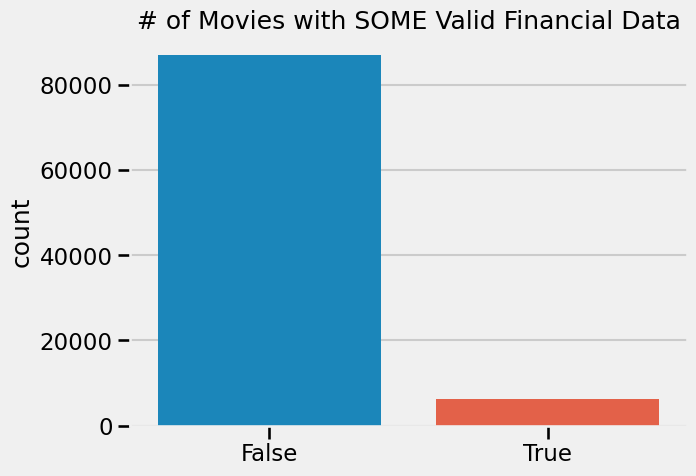

In [14]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with SOME Valid Financial Data');

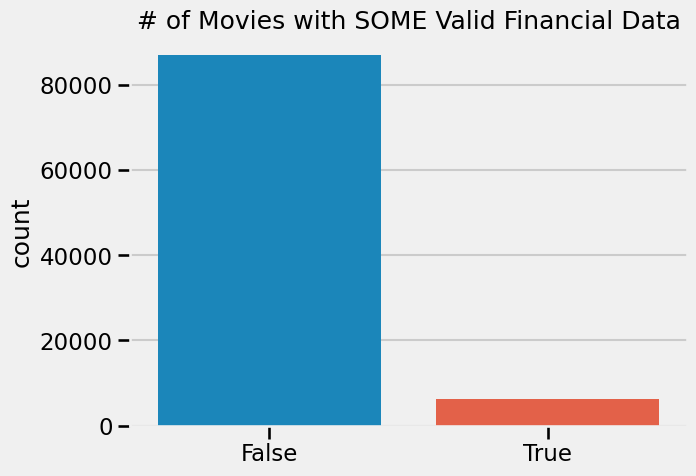

In [15]:
ax = sns.countplot(x=filter_financial)
ax.set_title('# of Movies with SOME Valid Financial Data');

>- There are 13,404 movies with financial data (either >0 for revenue OR budget)

<Axes: title={'center': '# of Movies with Both Revenue and Budget'}, ylabel='count'>

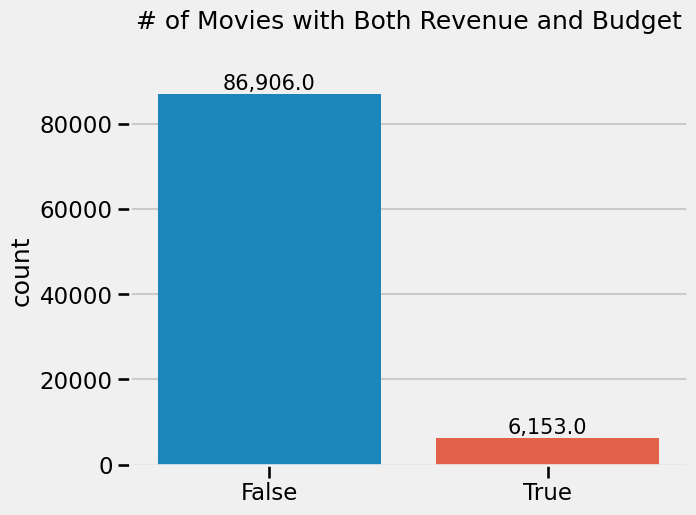

In [16]:
ax = sns.countplot(x=filter_and)
ax.set_title('# of Movies with Both Revenue and Budget',y=1.1);
pf.annotate_bars(ax,fmt=",")

In [17]:
## Using only filtered financial movies for remaining EDA
plot_df = df[filter_financial].copy()
plot_df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,tt0118694,cn,花樣年華,Two neighbors become intimate after discoverin...,27.940,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,2433,PG,2000.0
12,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,tt0120467,en,Vulgar,Vulgar is about a man who is a children's clow...,7.887,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.444,45,R,2002.0
14,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,tt0120630,en,Chicken Run,The creators of Wallace & Gromit bring you an ...,91.080,/oYbVT9e0k2ZSrRhDSCw2Yqshe1n.jpg,"[{'id': 297, 'logo_path': '/58TnhYZqbMYgkHM6lg...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-23,224834564,84,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's nothing more determined than poultry w...,Chicken Run,False,6.800,4704,G,2000.0
17,False,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,11.473,/iGRyPsZF0lfIL3IadmBdoAsYzyn.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-02-09,105983,122,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.893,303,R,2000.0
18,False,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,tt0120755,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,43.305,/1VMWLpk9VXyYcEZ8w3uUhp0OF1v.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-24,546400000,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.123,6299,NaN,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92808,False,/u9x18arVbh9VRY05aeJ43eaiI3t.jpg,NaN,36000000,"[{'id': 35, 'name': 'Comedy'}]",https://www.meangirls.com,673593,tt11762114,en,Mean Girls,New student Cady Heron is welcomed into the to...,276.559,/fbbj3viSUDEGT1fFFMNpHP1iUjw.jpg,"[{'id': 26402, 'logo_path': '/1BFbFgEhD1tJShFT...","[{'iso_3166_1': 'US', 'name': 'United States o...",2024-01-10,33200000,113,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Plastic is forever.,Mean Girls,False,6.800,53,PG-13,2024.0
92833,False,/pRb9zpNXH1u6Fd4Da9H8PaIDwoY.jpg,NaN,24066000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,868660,tt14564000,te,గుంటూరు కారం,"In 1998, Marx and Lenin in Guntur, both decide...",40.886,/rKzkysQNX9gQIONlMcmz4QvW0Nv.jpg,"[{'id': 69898, 'logo_path': '/bvPo07eG1gz3r6OC...","[{'iso_3166_1': 'IN', 'name': 'India'}]",2024-01-11,15323439,159,"[{'english_name': 'Telugu', 'iso_639_1': 'te',...",Released,Highly Inflammable,Guntur Kaaram,False,6.000,3,Na

# Q2: What Years are represented?

In [18]:
years =sorted( plot_df['Release Year'].dropna().astype(int).unique())
# years

- Figure saved as Images/EDA_year_counts.png


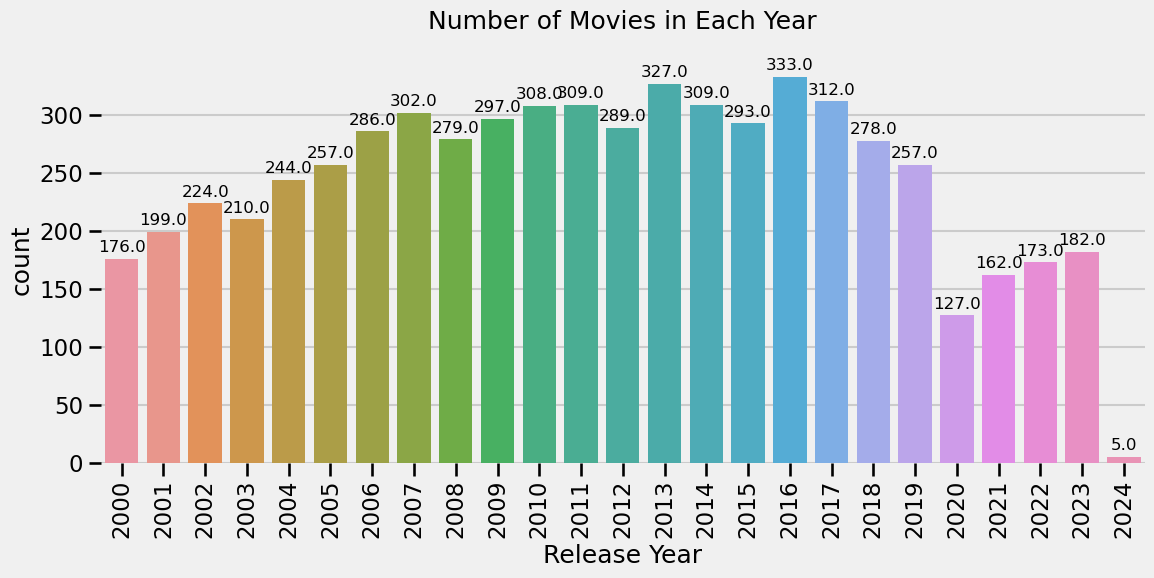

In [19]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=plot_df, x='Release Year', order =years );
ax.set_title('Number of Movies in Each Year',y=1.05)
pf.annotate_bars(ax, fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax
pf.savefig('Images/EDA_year_counts.png',ax=ax, facecolor='white')

### Average Revenue By Year

In [20]:
mill_fmt = pf.get_funcformatter(kind='m',prefix="$",float_fmt=',.0f')
mill_fmt

- Figure saved as Images/EDA_avg_revenue_per_year.png


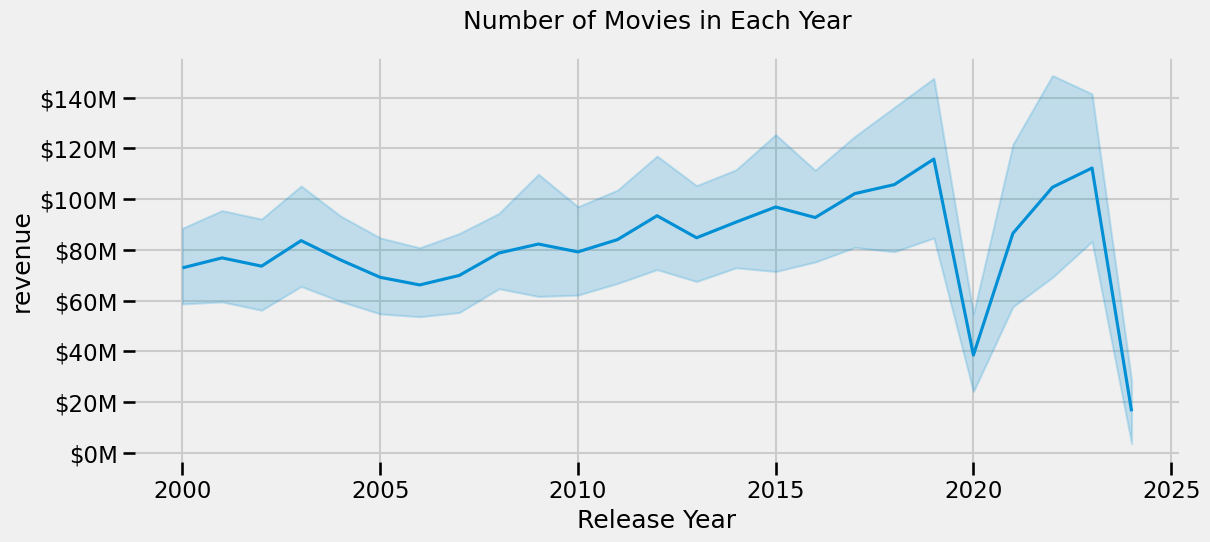

In [21]:
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=plot_df, x='Release Year', y='revenue',)#,order =years );
ax.set_title('Number of Movies in Each Year',y=1.05)
pf.annotate_bars(ax, fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(mill_fmt)
pf.savefig('Images/EDA_avg_revenue_per_year.png',ax=ax, facecolor='white')

## Q3: How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [22]:
df['certification'].value_counts()

R          6820
NR         5309
PG-13      3775
PG         1963
G           666
NC-17       196
PG-13         2
TV-PG         1
Unrated       1
Name: certification, dtype: int64

In [23]:
## fixing inconsitent certifications


# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}

df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      74326
R         6820
NR        5310
PG-13     3777
PG        1963
G          666
NC-17      196
TV-PG        1
Name: certification, dtype: int64

In [24]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NC-17','NR']

- Figure saved as Images/EDA_certification_counts.png


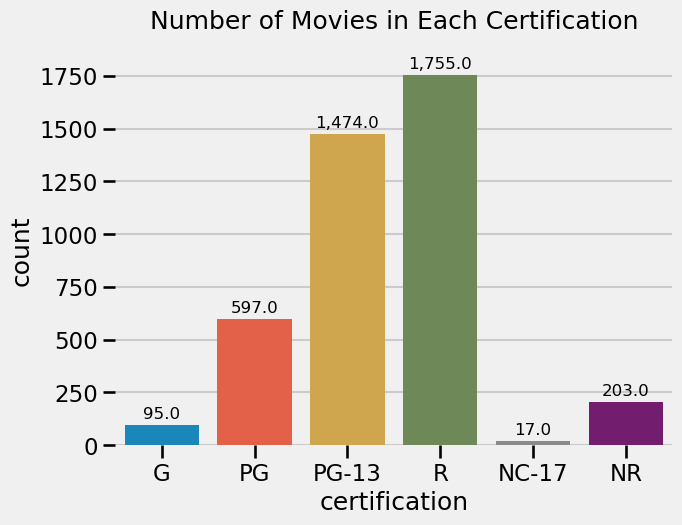

In [25]:
ax = sns.countplot(data=plot_df, x='certification',order=cert_order);
ax.set_title('Number of Movies in Each Certification',y=1.05)
pf.annotate_bars(ax,fmt=',',size=12,convert_millions=False,despine=True,
                 spines=['left','right','bottom'])
# sns.despine(ax.get_figure(),left=True)
pf.savefig('Images/EDA_certification_counts.png',ax=ax,
           facecolor='white')

## Q4: What is the average revenue per certification category?

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_96750/1263358667.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  ax= sns.barplot(data=plot_df, x='certification',y='revenue',


- Figure saved as Images/EDA_avg_revenue_by_certification.png


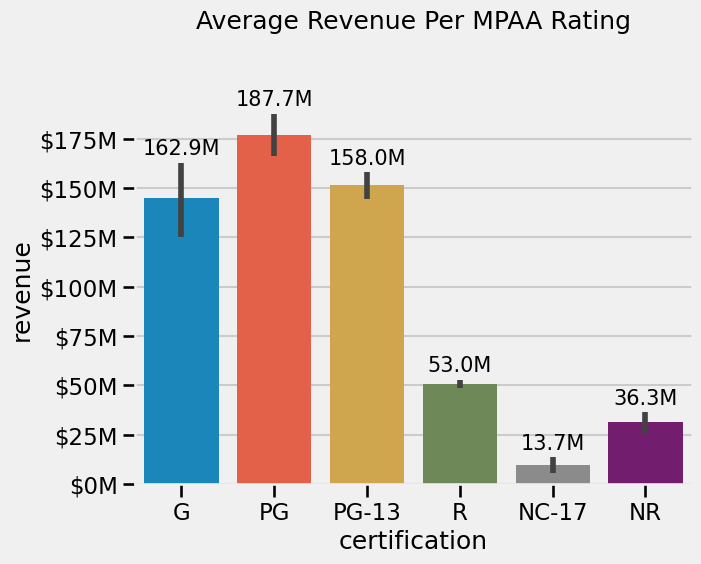

In [26]:
ax= sns.barplot(data=plot_df, x='certification',y='revenue', 
                order=cert_order,ci=68);
pf.annotate_bars(ax, convert_millions=True,fmt='.1f',use_errorbars=True,xytext=(0,10))
ax.set_title('Average Revenue Per MPAA Rating',y=1.15);
ax.yaxis.set_major_formatter(mill_fmt)
pf.savefig('Images/EDA_avg_revenue_by_certification.png',ax=ax, facecolor='white')

## Q5: What is the average budget per certification category?

- Figure saved as Images/EDA_avg_budget_certification.png


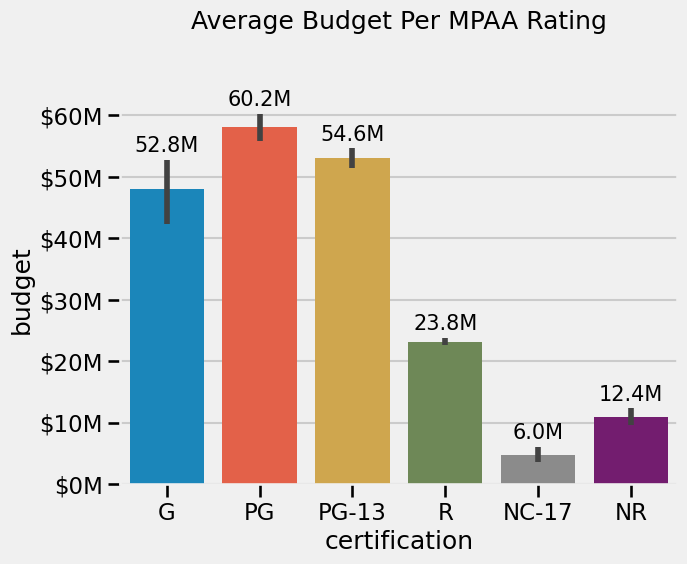

In [27]:
ax= sns.barplot(data=plot_df, x='certification',y='budget', 
                order=cert_order,errorbar=("ci",68));
pf.annotate_bars(ax, convert_millions=True,fmt='.1f',xytext= (0,10),use_errorbars=True)
ax.set_title('Average Budget Per MPAA Rating',y=1.15);
ax.yaxis.set_major_formatter(mill_fmt)
pf.savefig('Images/EDA_avg_budget_certification.png',ax=ax, facecolor='white')


## Q6: What is the average ROI (%) for Movies with All Financial Data?

In [28]:
## Save plot_df with movies that had buget AND revnue
plot_df = df[filter_and].copy()
## calculate ROI
plot_df['ROI (%)'] = (df['revenue']- df['budget'])/df['budget'] *100

plot_df.info()
plot_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6153 entries, 3 to 93058
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  6153 non-null   bool   
 1   backdrop_path          5922 non-null   object 
 2   belongs_to_collection  1366 non-null   object 
 3   budget                 6153 non-null   int64  
 4   genres                 6153 non-null   object 
 5   homepage               2972 non-null   object 
 6   id                     6153 non-null   int64  
 7   imdb_id                6153 non-null   object 
 8   original_language      6153 non-null   object 
 9   original_title         6153 non-null   object 
 10  overview               6146 non-null   object 
 11  popularity             6153 non-null   float64
 12  poster_path            6113 non-null   object 
 13  production_companies   6153 non-null   object 
 14  production_countries   6153 non-null   object 
 15  rel

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Release Year,ROI (%)
3,False,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,tt0118694,cn,花樣年華,Two neighbors become intimate after discoverin...,27.940,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,14204632,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,False,8.109,2433,PG,2000.0,9369.754667
12,False,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,tt0120467,en,Vulgar,Vulgar is about a man who is a children's clow...,7.887,/aLdezroGbHDP0w0jOLwxXjgrgma.jpg,"[{'id': 102045, 'logo_path': None, 'name': 'Ch...","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-04-26,14904,87,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,False,5.444,45,R,2002.0,-87.580000
14,False,/t7aJ7hqsMLEoqBJk7yAXxcAVvcz.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443,tt0120630,en,Chicken Run,The creators of Wallace & Gromit bring you an ...,91.080,/oYbVT9e0k2ZSrRhDSCw2Yqshe1n.jpg,"[{'id': 297, 'logo_path': '/58TnhYZqbMYgkHM6lg...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-23,224834564,84,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's nothing more determined than poultry w...,Chicken Run,False,6.800,4704,G,2000.0,399.632364
17,False,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318,tt0120753,en,The Million Dollar Hotel,The Million Dollar Hotel starts with a jump fr...,11.473,/iGRyPsZF0lfIL3IadmBdoAsYzyn.jpg,"[{'id': 1490, 'logo_path': None, 'name': 'Kint...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",2000-02-09,105983,122,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,False,5.893,303,R,2000.0,-98.675213
18,False,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955,tt0120755,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,43.305,/1VMWLpk9VXyYcEZ8w3uUhp0OF1v.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-24,546400000,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,False,6.123,6299,NaN,2000.0,337.120000


In [29]:
## remove NR from cert-order for ROI
cert_order_roi = cert_order[:-1]
cert_order_roi

['G', 'PG', 'PG-13', 'R', 'NC-17']

- Figure saved as Images/EDA_avg_roi_certification.png


/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_96750/638090306.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax= sns.barplot(data=plot_df, x='certification',y='ROI (%)',


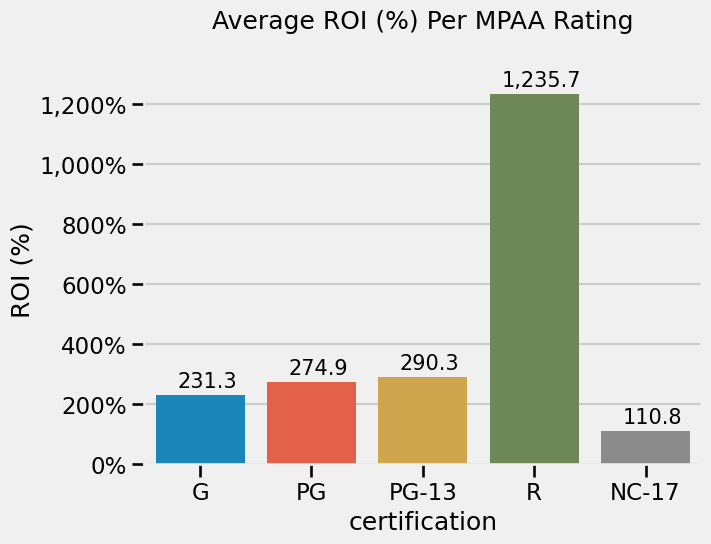

In [30]:
ax= sns.barplot(data=plot_df, x='certification',y='ROI (%)', 
                order=cert_order_roi,ci=None);
pf.annotate_bars(ax, convert_millions=False,ha='center',xytext=(5,10),fmt=',.1f')
ax.set_title('Average ROI (%) Per MPAA Rating',y=1.1);
ax.yaxis.set_major_formatter('{x:,.0f}%')
pf.savefig('Images/EDA_avg_roi_certification.png',ax=ax, facecolor='white')

# Summary

- According to initial EDA, R movies are more common, but generate less revenue. However, in terms of ROI, they are almost as successful as PG-13 movies.

# APPENDIX

In [31]:
# ## Testing new vers with dynamic number format
# from matplotlib.ticker import FuncFormatter
# def millions(x,pos,prefix='$', suffix=None,float_fmt=","):
#     """function for use wth matplotlib FuncFormatter -  formats money in millions"""
#     x = x*1e-6
#     if suffix is None:
#         suffix="M"
#     string = "{prefix}{x:"+float_fmt+"}{suffix}"
#     return string.format(prefix=prefix,x=x, suffix=suffix)

# fmt = FuncFormatter(lambda x,pos: millions(x,pos, float_fmt=',.0f'))

# # prefix='$'
# # suffix='M'
# # float_fmt = ".0f"

# # fmt = "{prefix}{x*1e-6:,"+float_fmt + "}{suffix}"
# # fmt.format(prefix=prefix, x=1e9,float_fmt=float_fmt, sff )

In [32]:
ax.lines

<Axes.ArtistList of 0 lines>

### BOOKMARK: Geting height of error bars for annotaitons 
- https://stackoverflow.com/questions/46270643/extracting-error-bars-and-point-positions-from-a-python-matplotlib-figure

In [33]:
# ax.lines

In [34]:
# def get_line_data(ax,just_error_heights=False):
#     """Adapted From Source: https://stackoverflow.com/a/46271417"""
#     x_list = []
#     lower_list = []
#     upper_list = []
#     for line in ax.lines:
#         x_list.append(line.get_xdata()[0])
#         lower_list.append(line.get_ydata()[0])
#         upper_list.append(line.get_ydata()[1])
        
#     y = 0.5 * (np.asarray(lower_list) + np.asarray(upper_list))
#     y_error = np.asarray(upper_list) - y
#     x = np.asarray(x_list)
    
#     if just_error_heights==False:
#         return x, y, y_error
#     else: 
#         return upper_list

In [35]:
# x_pos,y_pos,y_error = get_line_data(ax)
# y_error

In [36]:
# err_height= get_line_data(ax,just_error_heights=True)
# err_height

In [37]:
# ax.get_figure()